<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/Kmeans_%E5%AE%A2%E6%88%B6%E6%B6%88%E8%B2%BB%E7%BF%92%E6%85%A3%E8%AA%BF%E6%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
from urllib.request import urlretrieve
url = "https://www.kaggle.com/datasets/shwetabh123/mall-customers/download?datasetVersionNumber=1"
data = urlretrieve(url)

In [ ]:
customer_df = pd.read_csv("Mall_Customers.csv")
customer_df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
def trans(value):
  if value == "Male":
    value = 1
  else:
    value = 0
  return value

In [ ]:
customer_df["Genre"] = customer_df["Genre"].apply(trans)

In [ ]:
customer_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
# customer_df["clusters"] = kmeans_model.labels_

In [ ]:
customer_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
import numpy as np
x = np.array(customer_df)
print(x.shape) # 200筆資料 5 個欄位

(200, 5)


In [ ]:
import seaborn as sns
# sns.scatterplot(x=customer_df["Age"], y=customer_df["Spending Score (1-100)"], hue=customer_df["clusters"])

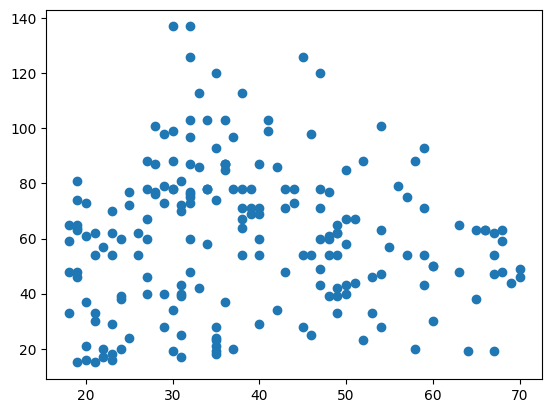

In [ ]:
plt.scatter(customer_df["Age"],
            customer_df["Annual Income (k$)"])

plt.xlabel=("Age")
plt.ylabel=("Annual Income (k$)")

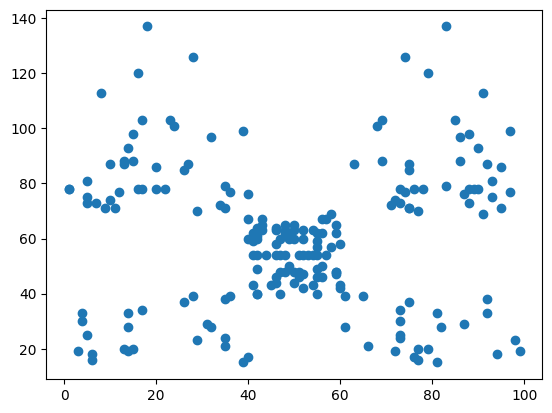

In [ ]:
plt.scatter(customer_df["Spending Score (1-100)"],
            customer_df["Annual Income (k$)"])
plt.xlabe=("Spending Score (1-100)")
plt.ylabel=("Annual Income (k$)")
plt.show()

In [ ]:
# relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
# customer_df = customer_df[relevant_cols]
# customer_df

Kmeans對於資料數值之間的距離差異很敏感
因此需要做scale來讓差異數值縮小

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaled_data = scaler2.fit_transform(customer_df)
# array type
pd.DataFrame(scaled_data)

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
pd.DataFrame(x_scale)

,0,1,2,3,4
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


In [ ]:
# 利用手肘法 找出最適合的分群
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

In [ ]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel = ("Number of Clusters (K)")
    plt.ylabel = ("Cluster Inertia")
    plt.title = ("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

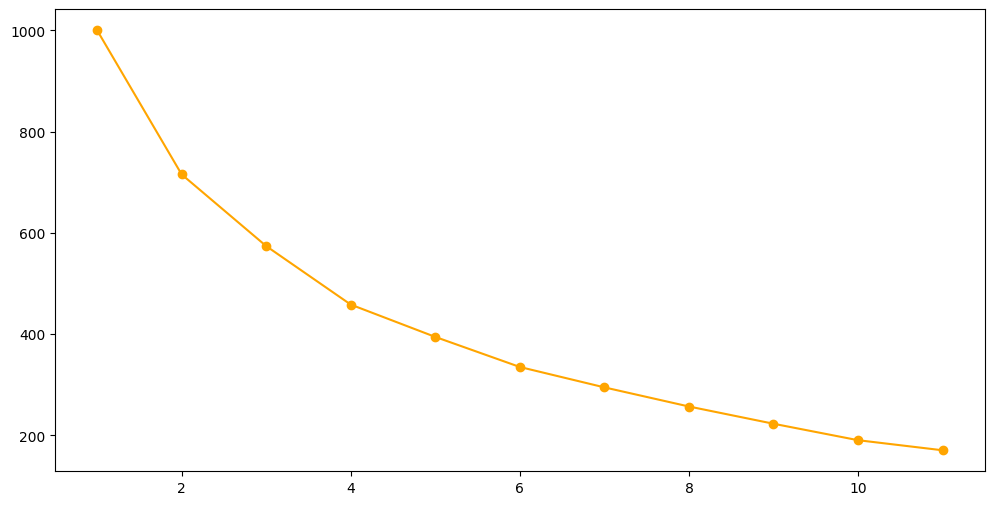

In [ ]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [ ]:
kmeans_model = KMeans(n_clusters = 8)

kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# 若不知道k該是多少 運用silhouette_score
plotx=[]
ploty=[]
for k in range(2,10):
  test_cluster=KMeans(n_clusters=k, n_init="auto")
  test_cluster.fit(scaled_data)
  score= silhouette_score(scaled_data, test_cluster.labels_)
  plotx.append(k)
  ploty.append(score)
print("k群",plotx)
print("score",ploty)

k群 [2, 3, 4, 5, 6, 7, 8, 9]
score [0.25418996301027574, 0.23575910370968337, 0.20830832938666674, 0.3092836489246719, 0.31869285030029465, 0.32779395076534334, 0.3525522620063279, 0.3725790153744621]


In [ ]:
customer_df["clusters"] = kmeans_model.labels_

customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


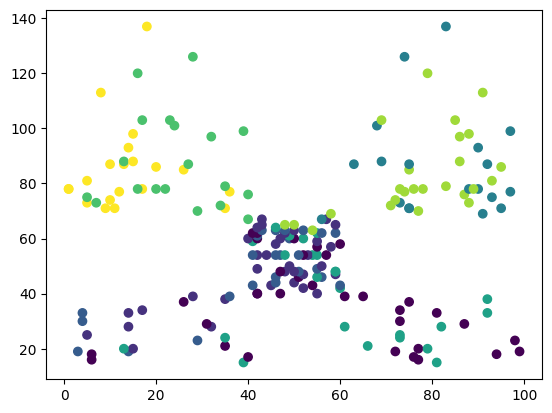

In [ ]:
plt.scatter(customer_df["Spending Score (1-100)"],
            customer_df["Annual Income (k$)"],
            c = customer_df["clusters"])
plt.xlabel=["spending score"]
plt.ylabel=["annual income"]